In [7]:
import utils.utils as utils
import os
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
path_to_data = os.getcwd() + "/data/"
# show current contents of data folder
! ls -l ./data/

total 491784
-rw-r--r--  1 justinuppal  staff  242661014 Oct  4 20:38 Police_Department_Incident_Reports__2018_to_Present.csv
-rw-r--r--  1 justinuppal  staff        451 Oct  4 20:35 remove_cols.dat


In [11]:
%%time
# Read in data file. If the data file is not present, attempt to curl from sfgov.org
#  (file is >230MB, so downloading can take ~5 minutes +/-)
# Also drop unneeded columns in the process (see utils/utils.py for details)
sf_crime = utils.get_dataset(path_to_data)
sf_crime.shape

CPU times: user 1.79 s, sys: 206 ms, total: 1.99 s
Wall time: 2.1 s


(645624, 13)

In [13]:
sf_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645624 entries, 0 to 645623
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Incident Datetime        645624 non-null  object 
 1   Report Datetime          645624 non-null  object 
 2   Report Type Code         645624 non-null  object 
 3   Report Type Description  645624 non-null  object 
 4   Filed Online             129793 non-null  object 
 5   Incident Code            645624 non-null  int64  
 6   Incident Category        645072 non-null  object 
 7   Incident Subcategory     645072 non-null  object 
 8   Incident Description     645624 non-null  object 
 9   Resolution               645624 non-null  object 
 10  Police District          645624 non-null  object 
 11  Latitude                 611538 non-null  float64
 12  Longitude                611538 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 64.0+ MB


In [15]:


sf_crime.columns = [c.replace(' ', '_') for c in sf_crime.columns]
sf_crime['Incident_Datetime'] = sf_crime['Incident_Datetime'].astype('datetime64[ns]')
sf_crime['Report_Datetime'] = sf_crime['Report_Datetime'].astype('datetime64[ns]')
#sf_crime['Report_Type_Code'] = sf_crime['Report_Type_Code'].astype('object')
#sf_crime['Report_Type_Description'] = sf_crime['Report_Type_Description'].astype('object')
#sf_crime['Filed_Online'] = sf_crime['Filed_Online'].astype('object')
#sf_crime['Incident_Code'] = sf_crime['Incident_Code'].astype('int64')
#sf_crime['Incident_Category'] = sf_crime['Incident_Category'].astype('object')
#sf_crime['Incident_Subcategory'] = sf_crime['Incident_Subcategory'].astype('object')
#sf_crime['Incident_Description'] = sf_crime['Incident_Description'].astype('object')
#sf_crime['Resolution'] = sf_crime['Resolution'].astype('object')
#sf_crime['Police_District'] = sf_crime['Police_District'].astype('object')
#sf_crime['Latitude'] = sf_crime['Latitude'].astype('float64')
#sf_crime['Longitude'] = sf_crime['Longitude'].astype('float64')
sf_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645624 entries, 0 to 645623
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Incident_Datetime        645624 non-null  datetime64[ns]
 1   Report_Datetime          645624 non-null  datetime64[ns]
 2   Report_Type_Code         645624 non-null  object        
 3   Report_Type_Description  645624 non-null  object        
 4   Filed_Online             129793 non-null  object        
 5   Incident_Code            645624 non-null  int64         
 6   Incident_Category        645072 non-null  object        
 7   Incident_Subcategory     645072 non-null  object        
 8   Incident_Description     645624 non-null  object        
 9   Resolution               645624 non-null  object        
 10  Police_District          645624 non-null  object        
 11  Latitude                 611538 non-null  float64       
 12  Longitude       

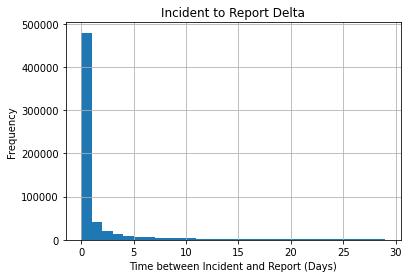

In [17]:
%matplotlib inline
from numpy import maximum

sf_crime['Report_Delta'] = sf_crime['Report_Datetime'] - sf_crime['Incident_Datetime']
#print(max(sf_crime.Report_Delta/ pd.Timedelta(days=1)))
(sf_crime.Report_Delta / pd.Timedelta(days=1)).hist(bins=range(0, 30, 1))
plt.title('Incident to Report Delta')
plt.xlabel('Time between Incident and Report (Days)')
plt.ylabel('Frequency');

In [19]:
#test

# Possible features

- Use API to get updated data
- functions to seperate and display data based on type of crime
- comparisons by crime type
- Time series analysis (Justin)
- delta between incident and report (David)
- geospatial representations (Aaron)